Problem Statement
Title: Predicting Resident Happiness Based on City Metrics

Objective: The goal is to develop a predictive model that can identify whether residents of a city are likely to be "happy" or "unhappy" based on their ratings of various city metrics. By analyzing the impact of different factors such as housing costs, school quality, and street maintenance on residents' happiness, we aim to uncover key drivers that contribute to a higher sense of satisfaction among city dwellers.

In [45]:
#Importing Libraries
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Loading Dataset
df = pd.read_csv('happydata.csv')
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


The dataset has all values as integers, meaning there is no need for any encoding

Exploratory Data Analysis (EDA)

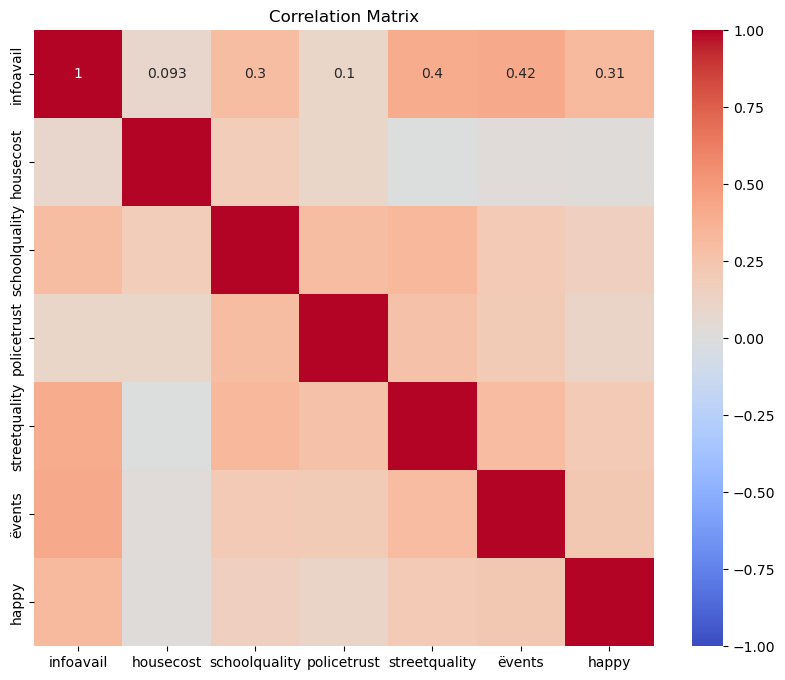

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.corr()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
infoavail,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521,0.312740
housecost,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546,0.019368
schoolquality,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006,0.163639
policetrust,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151,0.113356
streetquality,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402,0.206685
ëvents,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000,0.220729
happy,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729,1.000000


Correlation Interpretation:

Strong positive correlations (≥ 0.3):
1. infoavail and schoolquality (0.301971): There is a moderate positive correlation between information availability and school quality. This suggests that areas with better school quality tend to have more information available.
2. schoolquality and policetrust (0.298898): There is a moderate positive correlation between school quality and police trust. This implies that areas with better school quality tend to have higher police trust.

3. streetquality and events (0.307402): There is a moderate positive correlation between street quality and events. This suggests that areas with better street quality tend to have more events or activities.


Moderate positive correlations (≥ 0.1 and < 0.3):
1. infoavail and happy (0.312740): There is a moderate positive correlation between information availability and happiness. This implies that areas with more information available tend to have happier residents.

2. policetrust and happy (0.113356): There is a moderate positive correlation between police trust and happiness. This suggests that areas with higher police trust tend to have happier residents.


Weak correlations (≥ 0.01 and < 0.1):
1. housecost and infoavail (0.092676): There is a weak positive correlation between house cost and information availability.
   
2. housecost and events (0.024546): There is a weak positive correlation between house cost and events.
   
Negative correlations:
1. housecost and streetquality (-0.002141): There is a very weak negative correlation between house cost and street quality.

   Insights:
1. 
School quality is an important factor, as it is positively correlated with information availability, police trust, and happiness2. .
Street quality is also important, as it is positively correlated with events and happiness.
Information availability is positively correlated with happiness, suggesting that access to information is important for resident happine3. ss.
Police trust is positively correlated with happiness, implying that trust in the police is important for resident well-be4. ing.
House cost is not strongly correlated with any of the other variables, suggesting that it may not be a key factor in determining happiness or other out
   ciables.

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


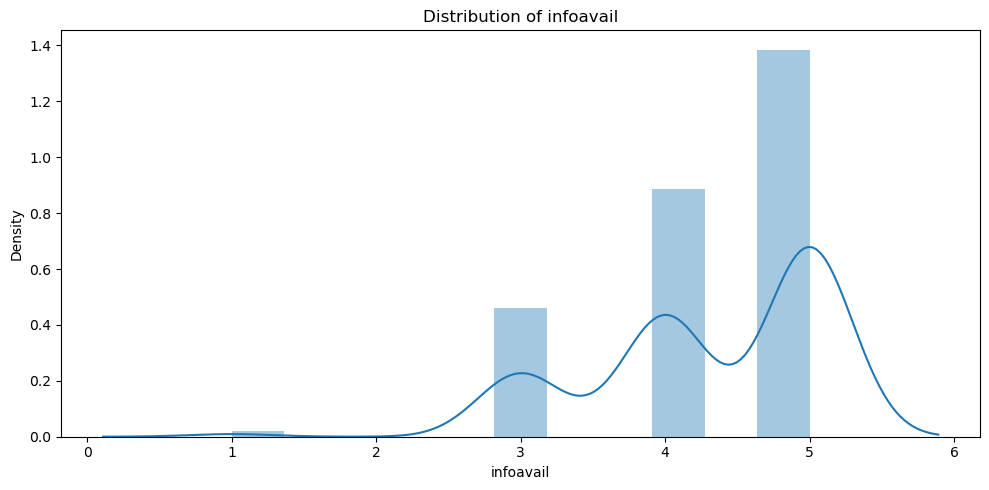

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


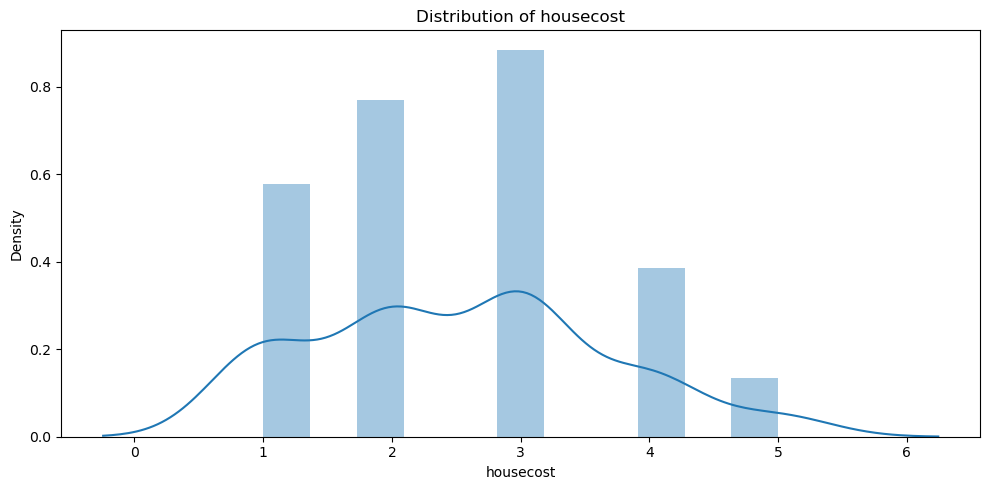

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


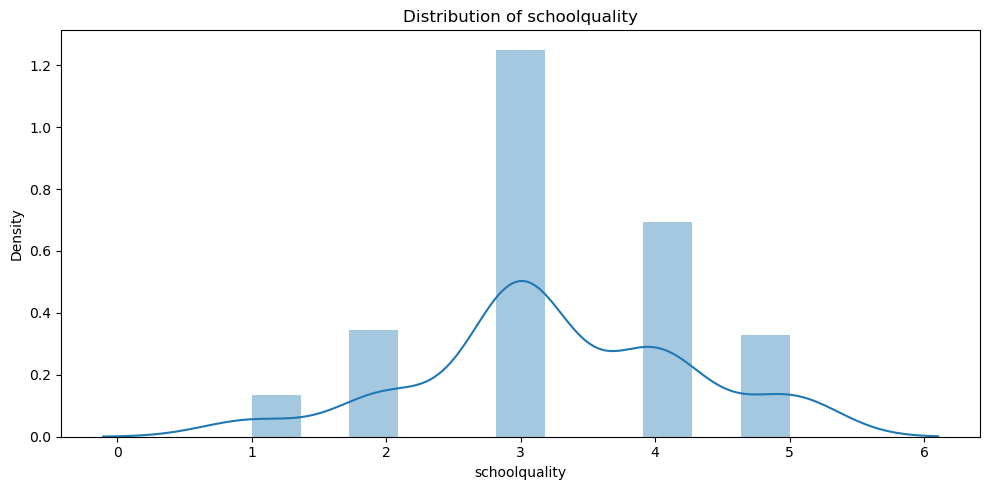

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


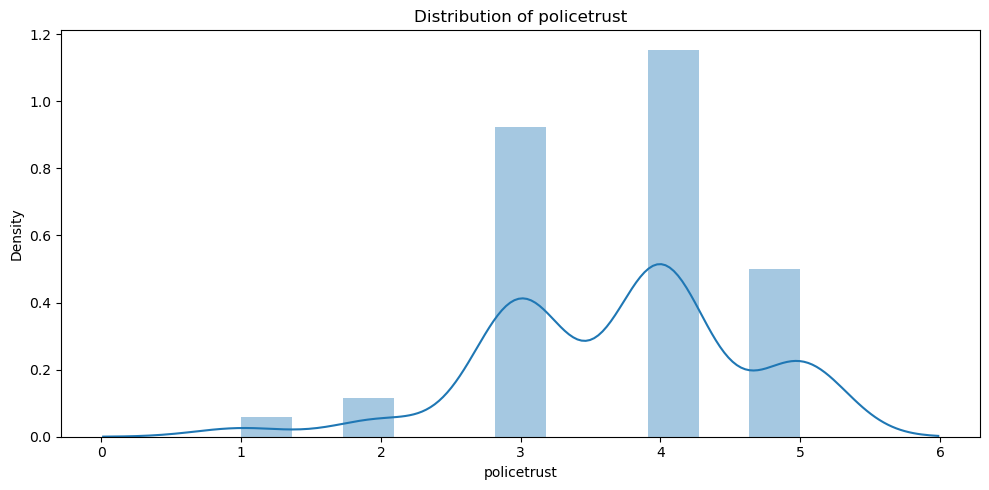

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


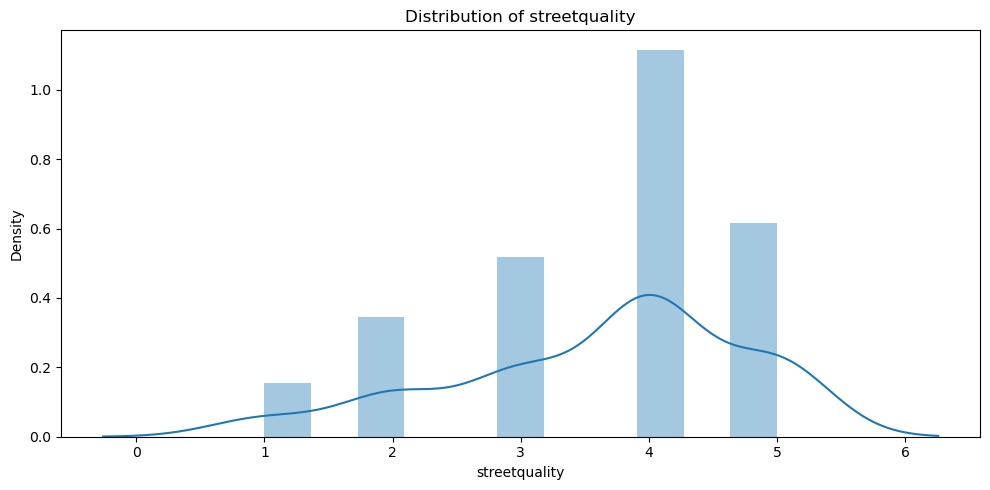

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


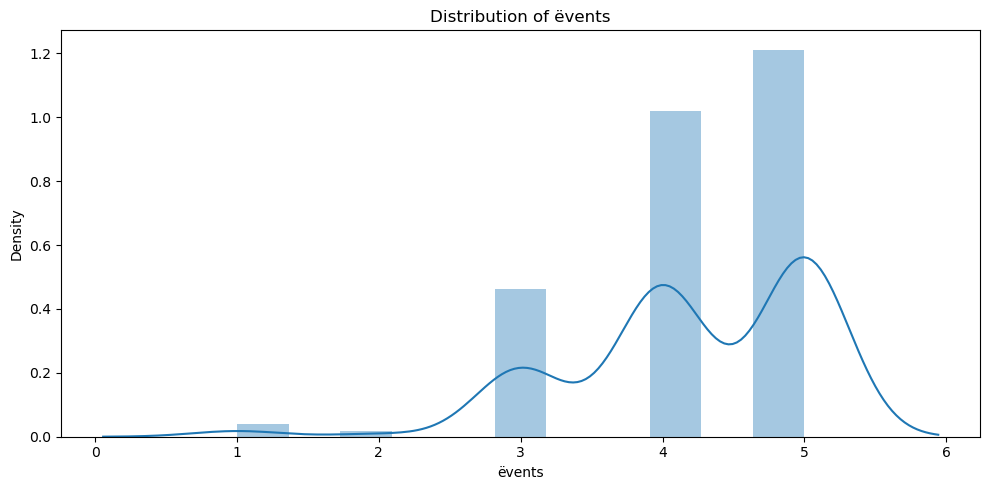

C:\Users\Charles\AppData\Local\Temp\ipykernel_40296\671364233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Charles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


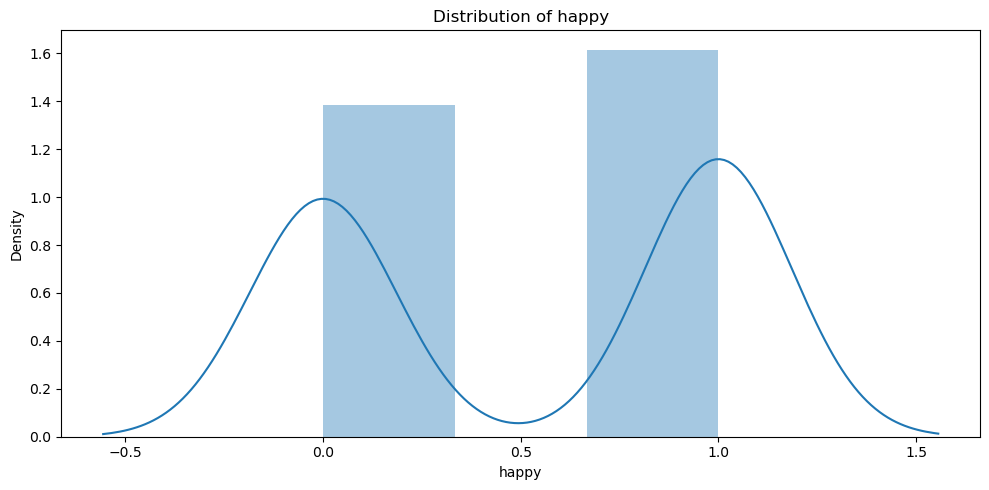

In [48]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

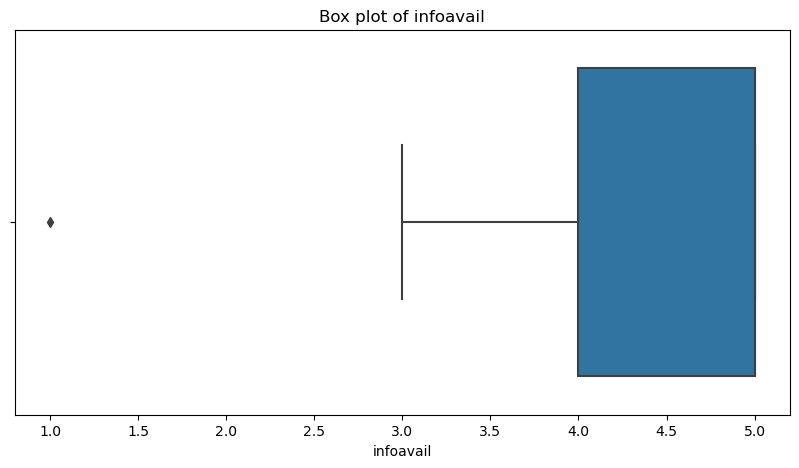

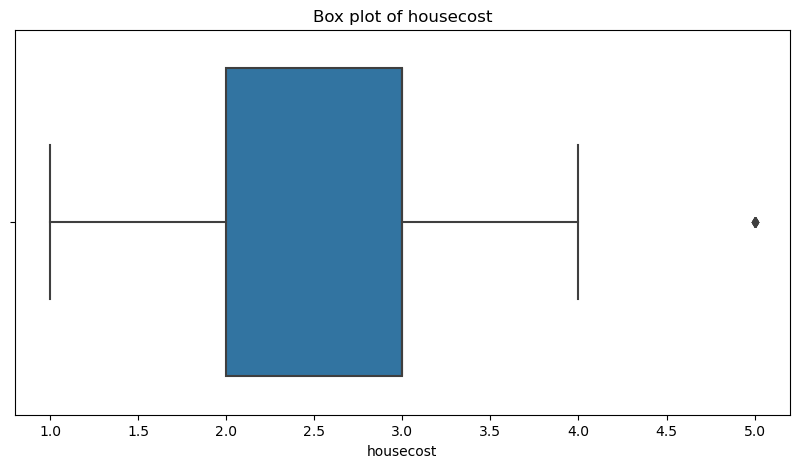

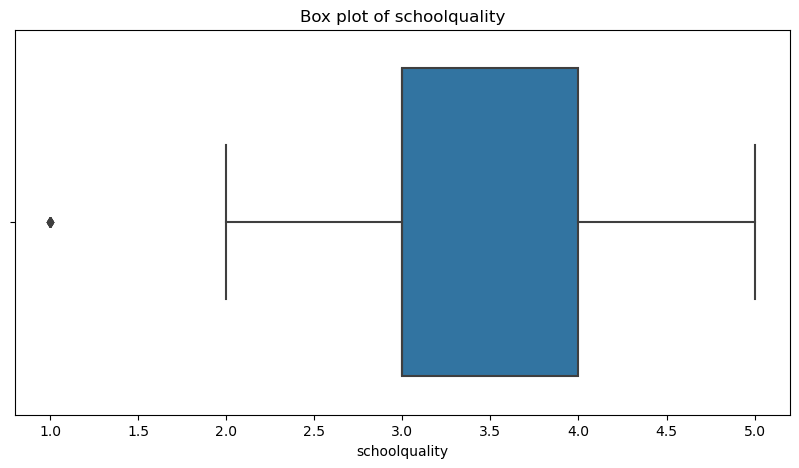

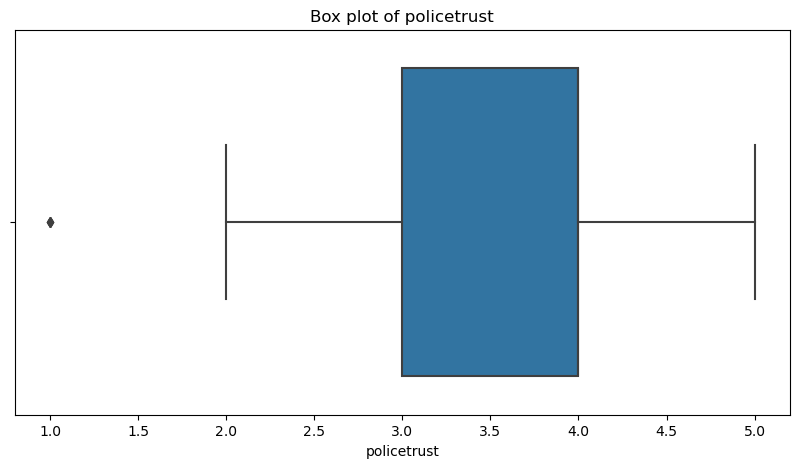

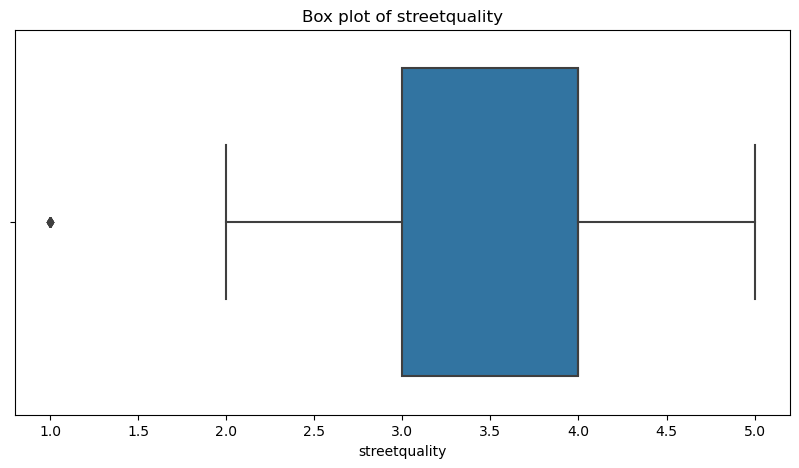

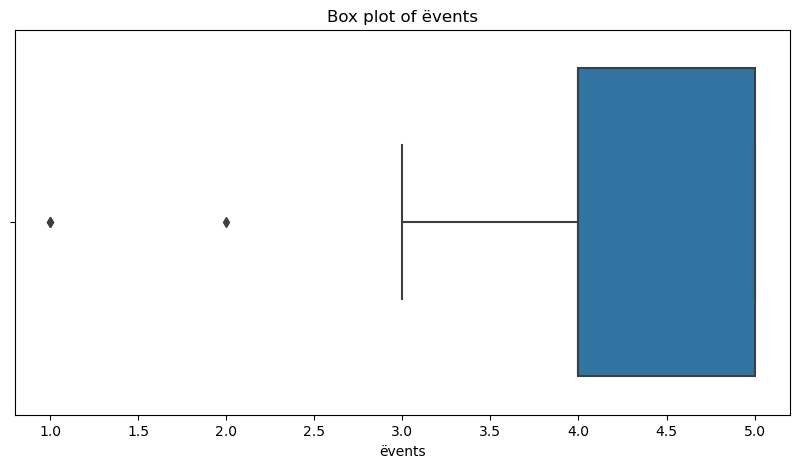

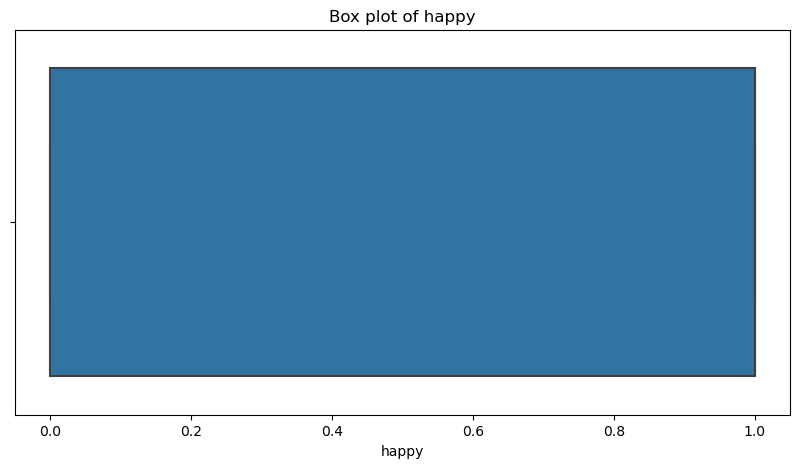

In [49]:
#chacking for Outliers
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

Removing Outliers

In [77]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Outlier rows: {outliers[0]}")


Outlier rows: [ 36  50 112 135 135 138]


In [78]:
outlier_rows = [36, 50, 112, 135, 135, 138]
df = df.drop(outlier_rows)
df = df.reset_index(drop=True)

Splitting of the data set, we shall start of with our baseline model which is Logistic Regression

In [111]:
#NORMAL SCALED
X = df.drop(columns=['happy'])
y = df['happy']

Our First baseline model we shall scale the data using standard scaler

In [112]:
#Standard Scaled
scaler = StandardScaler()
x_s = scaler.fit_transform(X)

WE shall scale the data using MinMaxScaler

In [113]:
#min max scaled
min_max_scaler = MinMaxScaler()
x_m= min_max_scaler.fit_transform(X)

Splitting of the Data

In [82]:
#normal split without standardizing data
x_train_n, x_test_n, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#data standardized using Standard Scaler
x_train_s, x_test_s, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)
#data standardized using MinMaxScaler
x_train_m, x_test_m, y_train, y_test = train_test_split(x_m, y, test_size=0.2, random_state=42)

In [83]:
#fitting normal data
log_reg = LogisticRegression()
log_reg.fit(x_train_n, y_train)
log_reg_n = log_reg.predict(x_test_n)
print('report for Logistic Regression with original data:\n', classification_report(y_test, log_reg_n))

report for Logistic Regression with original data:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28



In [84]:
log_reg.fit(x_train_s, y_train)
log_reg_s = log_reg.predict(x_test_s)
print('report for Logistic Regression with Standard scaled data:\n', classification_report(y_test, log_reg_s))

report for Logistic Regression with Standard scaled data:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28



In [85]:
log_reg.fit(x_train_m, y_train)
log_reg_m = log_reg.predict(x_test_m)
print('report for Logistic Regression with min max data:\n', classification_report(y_test, log_reg_m))

report for Logistic Regression with min max data:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28



Applying SMOTE to the data

In [70]:
from imblearn.over_sampling import SMOTE

In [93]:
#SMOTE for baseline ,odel
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_n, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(x_test_n)

# Print the classification report and confusion matrix
print(classification_report (y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.43      0.50      0.46        12

    accuracy                           0.50        28
   macro avg       0.50      0.50      0.50        28
weighted avg       0.51      0.50      0.50        28

[[8 8]
 [6 6]]


In [89]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_s, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred_s = logreg.predict(x_test_s)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred_s))
print(confusion_matrix(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28

[[9 7]
 [6 6]]


In [91]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_m, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred_m = logreg.predict(x_test_m)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred_m))
print(confusion_matrix(y_test, y_pred_m))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28

[[9 7]
 [6 6]]


Reguralization

In [101]:
# Define the logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_l1.fit(X_train_smote, y_train_smote)

# Define the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
log_reg_l2.fit(x_train_n, y_train)


# Make predictions on the test set
y_pred_l1 = log_reg_l1.predict(x_test_n)
y_pred_l2 = log_reg_l2.predict(x_test_n)

# Evaluate the models
print("L1 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:")
print(classification_report(y_test, y_pred_l1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

print("\nL2 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))


L1 Regularization:
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.43      1.00      0.60        12

    accuracy                           0.43        28
   macro avg       0.21      0.50      0.30        28
weighted avg       0.18      0.43      0.26        28

Confusion Matrix:
[[ 0 16]
 [ 0 12]]

L2 Regularization:
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.39      0.58      0.47        12

    accuracy                           0.43        28
   macro avg       0.44      0.45      0.43        28
weighted avg       0.45      0.43      0.42        28

Confusion Matrix:
[[ 5 11]
 [ 5  7]]


C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, it looks like the L2 regularization model is performing better than the L1 regularization model, at least in terms of the classification report and confusion matrix. However, it's worth noting that the accuracy is still relatively low

In [100]:
#with standard scaler
# Define the logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_l1.fit(X_train_smote, y_train_smote)

# Define the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
log_reg_l2.fit(x_train_s, y_train)


# Make predictions on the test set
y_pred_l1 = log_reg_l1.predict(x_test_s)
y_pred_l2 = log_reg_l2.predict(x_test_s)

# Evaluate the models
print("L1 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:")
print(classification_report(y_test, y_pred_l1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

print("\nL2 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))


L1 Regularization:
Accuracy: 0.5357142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28

Confusion Matrix:
[[9 7]
 [6 6]]

L2 Regularization:
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28

Confusion Matrix:
[[ 6 10]
 [ 6  6]]


C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


he L1 regularization model has a higher accuracy (0.54) compared to the L2 regularization model (0.43).
The L1 regularization model has a more balanced classification report, with precision and recall values that are closer together for both classes. This suggests that the L1 regularization is helping to prevent overfitting and improve the model's ability to generalize to new data.
The L1 regularization model has a higher macro average F1-score (0.53) compared to the L2 regularization model (0.44). This suggests that the L1 regularization model is doing a better job of capturing the underlying patterns in the data.
The confusion matrix for the L1 regularization model shows that it's making some mistakes, but it's not as biased towards predicting one class over the other. The model is correctly predicting 9 instances of class 0 and 6 instances of class 1.
The confusion matrix for the L2 regularization model shows that it's not performing as well, with more mistakes in both classes. The model is correctly predicting 6 instances of class 0 and 6 instances of class 1.
Overall, it looks like the L1 regularization model is still the better choice for this dataset. However, it's worth noting that the accuracy is still not very high, which suggests that there may be other issues with the model or the data

In [102]:
#with standard scaler
# Define the logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_l1.fit(X_train_smote, y_train_smote)

# Define the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
log_reg_l2.fit(x_train_s, y_train)


# Make predictions on the test set
y_pred_l1 = log_reg_l1.predict(x_test_m)
y_pred_l2 = log_reg_l2.predict(x_test_m)

# Evaluate the models
print("L1 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:")
print(classification_report(y_test, y_pred_l1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

print("\nL2 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))


L1 Regularization:
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.46      0.92      0.61        12

    accuracy                           0.50        28
   macro avg       0.60      0.55      0.46        28
weighted avg       0.62      0.50      0.43        28

Confusion Matrix:
[[ 3 13]
 [ 1 11]]

L2 Regularization:
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.43      1.00      0.60        12

    accuracy                           0.43        28
   macro avg       0.21      0.50      0.30        28
weighted avg       0.18      0.43      0.26        28

Confusion Matrix:
[[ 0 16]
 [ 0 12]]


C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

he L1 regularization model has a higher accuracy (0.5) compared to the L2 regularization model (0.43).
The L1 regularization model has a more balanced classification report, with precision and recall values that are closer together for both classes. This suggests that the L1 regularization is helping to prevent overfitting and improve the model's ability to generalize to new data.
The L1 regularization model has a higher macro average F1-score (0.46) compared to the L2 regularization model (0.30). This suggests that the L1 regularization model is doing a better job of capturing the underlying patterns in the data.
The confusion matrix for the L1 regularization model shows that it's making some mistakes, but it's not as biased towards predicting one class over the other. The model is correctly predicting 3 instances of class 0 and 11 instances of class 1.
The confusion matrix for the L2 regularization model shows that it's not predicting any instances of class 0 correctly, and it's only predicting class 1 correctly. This suggests that the L2 regularization is over-regularizing the model and causing it to lose its ability to capture the underlying patterns in the data.
Overall, it looks like the L1 regularization model is performing better than the L2 regularization model. However, it's worth noting that the accuracy is still relatively low,

Cross Validation

In [103]:
# Perform cross-validation with 5 folds for L1 regularization
scores_l1 = cross_val_score(log_reg_l1, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L1 Cross-validation scores:")
print(scores_l1)

print("L1 Mean cross-validation score:", scores_l1.mean())

# Perform cross-validation with 5 folds for L2 regularization
scores_l2 = cross_val_score(log_reg_l2, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L2 Cross-validation scores:")
print(scores_l2)

print("L2 Mean cross-validation score:", scores_l2.mean())

# Train the L1 regularization model on the entire training set and evaluate on the test set
log_reg_l1.fit(X_train_smote, y_train_smote)
y_pred_l1 = log_reg_l1.predict(x_test_n)

print("L1 Test set accuracy:", accuracy_score(y_test, y_pred_l1))
print("L1 Test set classification report:")
print(classification_report(y_test, y_pred_l1))
print("L1 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l1))

# Train the L2 regularization model on the entire training set and evaluate on the test set
log_reg_l2.fit(X_train_smote, y_train_smote)
y_pred_l2 = log_reg_l2.predict(x_test_n)

print("L2 Test set accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 Test set classification report:")
print(classification_report(y_test, y_pred_l2))
print("L2 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l2))

L1 Cross-validation scores:
[0.5  0.48 0.48 0.52 0.52]
L1 Mean cross-validation score: 0.5
L2 Cross-validation scores:
[0.5  0.48 0.6  0.84 0.68]
L2 Mean cross-validation score: 0.62
L1 Test set accuracy: 0.42857142857142855
L1 Test set classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.43      1.00      0.60        12

    accuracy                           0.43        28
   macro avg       0.21      0.50      0.30        28
weighted avg       0.18      0.43      0.26        28

L1 Test set confusion matrix:
[[ 0 16]
 [ 0 12]]
L2 Test set accuracy: 0.5
L2 Test set classification report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.43      0.50      0.46        12

    accuracy                           0.50        28
   macro avg       0.50      0.50      0.50        28
weighted avg       0.51      0.

C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, it looks like the L2 regularization model is performing better than the L1 regularization model on this dataset. However, it's worth noting that the accuracy is still not very high

Standard Scaled Data

In [105]:

scores_l1 = cross_val_score(log_reg_l1, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L1 Cross-validation scores:")
print(scores_l1)

print("L1 Mean cross-validation score:", scores_l1.mean())

# Perform cross-validation with 5 folds for L2 regularization
scores_l2 = cross_val_score(log_reg_l2, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L2 Cross-validation scores:")
print(scores_l2)

print("L2 Mean cross-validation score:", scores_l2.mean())

# Train the L1 regularization model on the entire training set and evaluate on the test set
log_reg_l1.fit(X_train_smote, y_train_smote)
y_pred_l1 = log_reg_l1.predict(x_test_s)

print("L1 Test set accuracy:", accuracy_score(y_test, y_pred_l1))
print("L1 Test set classification report:")
print(classification_report(y_test, y_pred_l1))
print("L1 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l1))

# Train the L2 regularization model on the entire training set and evaluate on the test set
log_reg_l2.fit(X_train_smote, y_train_smote)
y_pred_l2 = log_reg_l2.predict(x_test_s)

print("L2 Test set accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 Test set classification report:")
print(classification_report(y_test, y_pred_l2))
print("L2 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l2))

L1 Cross-validation scores:
[0.5  0.48 0.48 0.52 0.52]
L1 Mean cross-validation score: 0.5
L2 Cross-validation scores:
[0.5  0.48 0.6  0.84 0.68]
L2 Mean cross-validation score: 0.62
L1 Test set accuracy: 0.5357142857142857
L1 Test set classification report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28

L1 Test set confusion matrix:
[[9 7]
 [6 6]]
L2 Test set accuracy: 0.5714285714285714
L2 Test set classification report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        16
           1       0.00      0.00      0.00        12

    accuracy                           0.57        28
   macro avg       0.29      0.50      0.36        28
weighted avg       0.

C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Overall, it looks like the L1 regularization model is performing better than the L2 regularization model on this dataset. However, it's worth noting that the accuracy is still not very high

Cross Validation on MinMax Scaled Data

In [106]:
scores_l1 = cross_val_score(log_reg_l1, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L1 Cross-validation scores:")
print(scores_l1)

print("L1 Mean cross-validation score:", scores_l1.mean())

# Perform cross-validation with 5 folds for L2 regularization
scores_l2 = cross_val_score(log_reg_l2, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("L2 Cross-validation scores:")
print(scores_l2)

print("L2 Mean cross-validation score:", scores_l2.mean())

# Train the L1 regularization model on the entire training set and evaluate on the test set
log_reg_l1.fit(X_train_smote, y_train_smote)
y_pred_l1 = log_reg_l1.predict(x_test_m)

print("L1 Test set accuracy:", accuracy_score(y_test, y_pred_l1))
print("L1 Test set classification report:")
print(classification_report(y_test, y_pred_l1))
print("L1 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l1))

# Train the L2 regularization model on the entire training set and evaluate on the test set
log_reg_l2.fit(X_train_smote, y_train_smote)
y_pred_l2 = log_reg_l2.predict(x_test_m)

print("L2 Test set accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 Test set classification report:")
print(classification_report(y_test, y_pred_l2))
print("L2 Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_l2))

L1 Cross-validation scores:
[0.5  0.48 0.48 0.52 0.52]
L1 Mean cross-validation score: 0.5
L2 Cross-validation scores:
[0.5  0.48 0.6  0.84 0.68]
L2 Mean cross-validation score: 0.62
L1 Test set accuracy: 0.5
L1 Test set classification report:
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.46      0.92      0.61        12

    accuracy                           0.50        28
   macro avg       0.60      0.55      0.46        28
weighted avg       0.62      0.50      0.43        28

L1 Test set confusion matrix:
[[ 3 13]
 [ 1 11]]
L2 Test set accuracy: 0.5714285714285714
L2 Test set classification report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        16
           1       0.00      0.00      0.00        12

    accuracy                           0.57        28
   macro avg       0.29      0.50      0.36        28
weighted avg       0.33      0.5

C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Overall, it looks like neither model is performing well on this dataset. The L1 regularization model is biased towards predicting class 1, while the L2 regularization model is over-regularizing the model and causing it to lose its ability to capture the underlying patterns in the data.

LOGISTIC REGRESSION RESULTS
In our logistic regression model we have performed different techniques to acquire a perfect model by firstly standardizing the data into three sets by spliting normally. using standard scaler and using min max scaler, we the found the accuracy of all of them which we found in all three of the sets the model produced relatively low accuracy, we then tried to hypertune it by using SMOTE to distribute the data evenly, we still encounterd the same problem, then we tried to reguralize the data by setting the l1 and l2 penalties and still got the same results and wee used cross validation method and still got the same results,

SOLUTION:
Try another classification model which is decison tree

DECISION TREE

In [109]:
#importing the classifier 
from sklearn.tree import DecisionTreeClassifier

In [110]:
scaler = StandardScaler()
x_s = scaler.fit_transform(X)

In [114]:
min_max_scaler = MinMaxScaler()
x_m= min_max_scaler.fit_transform(X)

In [115]:
#NORMAL SCALED
X = df.drop(columns=['happy'])
y = df['happy']

In [116]:
#normal split without standardizing data
x_train_n, x_test_n, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#data standardized using Standard Scaler
x_train_s, x_test_s, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)
#data standardized using MinMaxScaler
x_train_m, x_test_m, y_train, y_test = train_test_split(x_m, y, test_size=0.2, random_state=42)

Fitting

In [117]:
#Normal Data
#fitting normal data
desc = DecisionTreeClassifier()
desc.fit(x_train_n, y_train)
desc_n = desc.predict(x_test_n)
print('report for Decision Tree with original data:\n', classification_report(y_test, log_reg_n))

report for Decision Tree with original data:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28



In [123]:
y_train.value_counts()

happy
1    63
0    47
Name: count, dtype: int64

The Decision Tree classifier is not performing well on this dataset, with an accuracy of only 0.43.
The precision and recall values for both classes are relatively low, indicating that the model is not accurately predicting either class.

In [124]:
#standardized Data
desc.fit(x_train_s, y_train)
log_reg_s = desc.predict(x_test_s)
print('report for Decision Tree with Standard scaled data:\n', classification_report(y_test, log_reg_s))

report for Decision Tree with Standard scaled data:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28



The Decision Tree classifier performs slightly better on the standard scaled data, with an accuracy of 0.54 compared to 0.43 on the original data.
The Decision Tree classifier is still not performing exceptionally well, with an accuracy of only 0.54.
The precision and recall values for both classes are still relatively low, indicating that the model is not accurately predicting either class.

In [125]:
desc.fit(x_train_m, y_train)
log_reg_m = desc.predict(x_test_m)
print('report for Decision Tree with min max data:\n', classification_report(y_test, log_reg_m))

report for Decision Tree with min max data:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.50      0.50      0.50        12

    accuracy                           0.57        28
   macro avg       0.56      0.56      0.56        28
weighted avg       0.57      0.57      0.57        28



The Decision Tree classifier performs slightly better on the Min-Max scaled data, with an accuracy of 0.57 compared to 0.54 on the standard scaled data.
The precision, recall, and F1-score for Class 0 have improved, indicating that the Min-Max scaling has helped to improve the model's performance on this class.

The Decision Tree classifier is still not performing exceptionally well, with an accuracy of only 0.57.

Maximum Depth

In [127]:
#Normal data
# Define the maximum depths to experiment with
max_depths = [1, 3, 5, 7, 9]

# Perform the experiment
for max_depth in max_depths:
    desc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    desc.fit(x_train_n, y_train)
    
    y_pred_n_max = desc.predict(x_test_n)
    
    print(f"Maximum Depth: {max_depth}")
    print(classification_report(y_test, y_pred_n_max))
    print()

Maximum Depth: 1
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28


Maximum Depth: 3
              precision    recall  f1-score   support

           0       0.57      0.25      0.35        16
           1       0.43      0.75      0.55        12

    accuracy                           0.46        28
   macro avg       0.50      0.50      0.45        28
weighted avg       0.51      0.46      0.43        28


Maximum Depth: 5
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        16
           1       0.20      0.17      0.18        12

    accuracy                           0.36        28
   macro avg       0.32      0.33      0.33        28
weighted avg       0.

In [129]:
#Standard Scaled
# Define the maximum depths to experiment with
max_depths = [1, 3, 5, 7, 9]

# Perform the experiment
for max_depth in max_depths:
    desc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    desc.fit(x_train_s, y_train)
    
    y_pred_s_max = desc.predict(x_test_s)
    
    print(f"Maximum Depth: {max_depth}")
    print(classification_report(y_test, y_pred_s_max))
    print()

Maximum Depth: 1
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28


Maximum Depth: 3
              precision    recall  f1-score   support

           0       0.57      0.25      0.35        16
           1       0.43      0.75      0.55        12

    accuracy                           0.46        28
   macro avg       0.50      0.50      0.45        28
weighted avg       0.51      0.46      0.43        28


Maximum Depth: 5
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        16
           1       0.20      0.17      0.18        12

    accuracy                           0.36        28
   macro avg       0.32      0.33      0.33        28
weighted avg       0.

The model performs relatively well on Class 0, with a precision of 0.60 and a recall of 0.56, resulting in an F1 score of 0.58.

However, the model struggles to classify Class 1 accurately, with a precision of 0.46 and a recall of 0.50, resulting in an F1 score of 0.48.

In [130]:
#Min Max Scaled
# Define the maximum depths to experiment with
max_depths = [1, 3, 5, 7, 9]

# Perform the experiment
for max_depth in max_depths:
    desc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    desc.fit(x_train_m, y_train)
    
    y_pred_m_max = desc.predict(x_test_m)
    
    print(f"Maximum Depth: {max_depth}")
    print(classification_report(y_test, y_pred_m_max))
    print()

Maximum Depth: 1
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.46      0.50      0.48        12

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28


Maximum Depth: 3
              precision    recall  f1-score   support

           0       0.57      0.25      0.35        16
           1       0.43      0.75      0.55        12

    accuracy                           0.46        28
   macro avg       0.50      0.50      0.45        28
weighted avg       0.51      0.46      0.43        28


Maximum Depth: 5
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        16
           1       0.20      0.17      0.18        12

    accuracy                           0.36        28
   macro avg       0.32      0.33      0.33        28
weighted avg       0.

ves again at a maximum depth of 7. However, the performance at a maximum depth of 7 is still not as good as at a maximum depth of 1 or 9.

This suggests that the optimal maximum depth for this problem is likely to be around 1 or 9, and that increasing the maximum depth beyond this point may lead to overfitting

Maximum Dephth hasn't worked out the best

RANDOM OVERSAMPLING

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
#NORMAL DATA
ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train_n, y_train)
desc.fit(x_train_res, y_train_res)
y_pred_res = desc.predict(x_test_n)
print("Accuracy:", accuracy_score(y_test, y_pred_res))
print("Classification Report:")
print(classification_report(y_test, y_pred_res))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_res))


Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.42      0.42      0.42        12

    accuracy                           0.50        28
   macro avg       0.49      0.49      0.49        28
weighted avg       0.50      0.50      0.50        28

Confusion Matrix:
[[9 7]
 [7 5]]


In [138]:
#STANDARD SCALED DATA
ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train_s, y_train)
desc.fit(x_train_res, y_train_res)
y_pred_res = desc.predict(x_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred_res))
print("Classification Report:")
print(classification_report(y_test, y_pred_res))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_res))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.42      0.42      0.42        12

    accuracy                           0.50        28
   macro avg       0.49      0.49      0.49        28
weighted avg       0.50      0.50      0.50        28

Confusion Matrix:
[[9 7]
 [7 5]]


The accuracy of your model is still 0.5, which means it's not performing well. The classification report and confusion matrix also indicate that the model is not doing a good job of distinguishing between the two classes

In [139]:
#MIN MAXSCALED DATA
ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train_m, y_train)
desc.fit(x_train_res, y_train_res)
y_pred_res = desc.predict(x_test_m)
print("Accuracy:", accuracy_score(y_test, y_pred_res))
print("Classification Report:")
print(classification_report(y_test, y_pred_res))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_res))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.42      0.42      0.42        12

    accuracy                           0.50        28
   macro avg       0.49      0.49      0.49        28
weighted avg       0.50      0.50      0.50        28

Confusion Matrix:
[[9 7]
 [7 5]]


It seems like the model is performing randomly, with an accuracy of 0.5. This is because the model is predicting class 0 correctly 9 times out of 16, and class 1 correctly 5 times out of 12, which is roughly equal to the proportion of each class in the dataset

RESULT:
The best model result is decision tree classifier using random sampling to perfectly distribute the data, without over fitting and underfitting, given the dataset it has achieved the best resulting, however the dataset needs additional data to perform at its peak